<a href="https://colab.research.google.com/github/nthang2/Hotel-rating-prediction/blob/DucMinh/hotel_rating_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Import and load dataset

In [150]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

In [151]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [152]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/tripadvisor_hotel_reviews.csv')

## 2. Overview Data

In [153]:
df.head()

,Review,Rating
0,"nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews did valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff neck high pillows, not soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway, maybe just noisy neighbors, aveda bath products nice, did not goldfish stay nice touch taken advantage staying longer, location great walking distance shopping, overall nice experience having pay 40 parking night,",4
1,"ok nothing special charge diamond member hilton decided chain shot 20th anniversary seattle, start booked suite paid extra website description not, suite bedroom bathroom standard hotel room, took printed reservation desk showed said things like tv couch ect desk clerk told oh mixed suites description kimpton website sorry free breakfast, got kidding, embassy suits sitting room bathroom bedroom unlike kimpton calls suite, 5 day stay offer correct false advertising, send kimpton preferred guest website email asking failure provide suite advertised website reservation description furnished hard copy reservation printout website desk manager duty did not reply solution, send email trip guest survey did not follow email mail, guess tell concerned guest.the staff ranged indifferent not helpful, asked desk good breakfast spots neighborhood hood told no hotels, gee best breakfast spots seattle 1/2 block away convenient hotel does not know exist, arrived late night 11 pm inside run bellman busy chating cell phone help bags.prior arrival emailed hotel inform 20th anniversary half really picky wanted make sure good, got nice email saying like deliver bottle champagne chocolate covered strawberries room arrival celebrate, told needed foam pillows, arrival no champagne strawberries no foam pillows great room view alley high rise building good not better housekeeping staff cleaner room property, impressed left morning shopping room got short trips 2 hours, beds comfortable.not good ac-heat control 4 x 4 inch screen bring green shine directly eyes night, light sensitive tape controls.this not 4 start hotel clean business hotel super high rates, better chain hotels seattle,",2
2,"nice rooms not 4* experience hotel monaco seattle good hotel n't 4* level.positives large bathroom mediterranean suite comfortable bed pillowsattentive housekeeping staffnegatives ac unit malfunctioned stay desk disorganized, missed 3 separate wakeup calls, concierge busy hard touch, did n't provide guidance special requests.tv hard use ipod sound dock suite non functioning. decided book mediterranean suite 3 night weekend stay 1st choice rest party filled, comparison w spent 45 night larger square footage room great soaking tub whirlpool jets nice shower.before stay hotel arrange car service price 53 tip reasonable driver waiting arrival.checkin easy downside room picked 2 person jacuzi tub no bath accessories salts bubble bath did n't stay, night got 12/1a checked voucher bottle champagne nice gesture fish waiting room, impression room huge open space felt room big, tv far away bed chore change channel, ipod dock broken disappointing.in morning way asked desk check thermostat said 65f 74 2 degrees warm try cover face night bright blue light kept, got room night no, 1st drop desk, called maintainence came look thermostat told play settings happy digital box wo n't work, asked wakeup 10am morning did n't happen, called later 6pm nap wakeup forgot, 10am wakeup morning yep forgotten.the bathroom facilities great room surprised room sold whirlpool bath tub n't bath amenities, great relax water jets going,",3
3,"unique, great stay, wonderful time hotel monaco, location excellent short stroll main downtown shopping area, pet friendly room showed no signs animal hair smells, monaco suite sleeping area big striped curtains pulled closed nice touch felt cosy, goldfish n

In [154]:
df.shape

(20491, 2)

<Axes: xlabel='Rating', ylabel='count'>

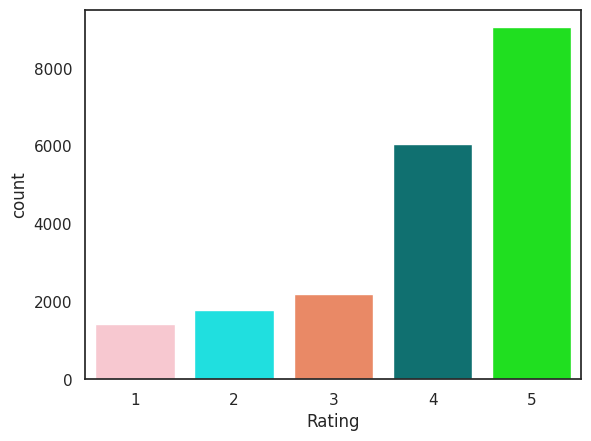

In [155]:
sns.set_theme(style="white", color_codes=True)
sns.countplot(x = df['Rating'], palette=['pink', 'Aqua','coral','teal', 'lime'])

In [156]:
from imblearn.under_sampling import RandomUnderSampler
X= df['Review'].values.reshape(-1,1)
y = df['Rating'].values
undersampler = RandomUnderSampler(random_state = 42)
X_resampled, y_resampled = undersampler.fit_resample(X, y)

In [157]:
df_resampled = pd.DataFrame({'Review': X_resampled.flatten(), 'Rating': y_resampled})
df = df_resampled
df['Review'] = X_resampled.flatten()
df['Rating'] = y_resampled

<Axes: ylabel='count'>

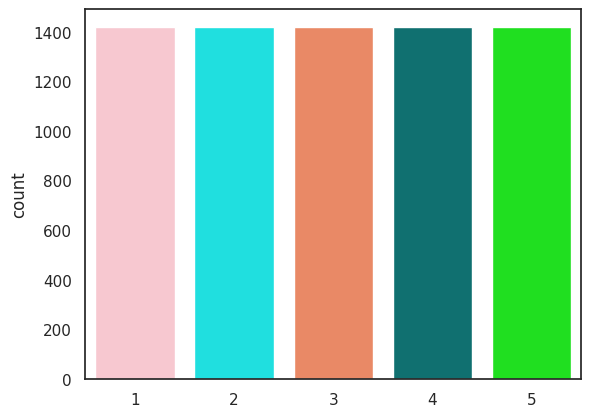

In [137]:
sns.set_theme(style="white", color_codes=True)
sns.countplot(x = y_resampled, palette=['pink', 'Aqua','coral','teal', 'lime'])

## 3. Perform EDA

In [10]:
df.describe()

,rating
count,7105.000000
mean,3.000000
std,1.414313
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,5.000000


In [21]:
df.isnull()

,Review,Rating
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
7100,False,False
7101,False,False
7102,False,False
7103,False,False


In [12]:
df.isnull().sum()

reviews    0
rating     0
dtype: int64

<Axes: xlabel='Rating'>

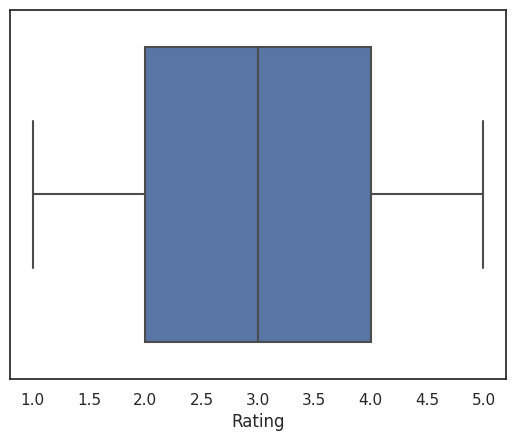

In [20]:
sns.boxplot(x = df['Rating'])

No outline in dataset

<Axes: xlabel='Rating', ylabel='count'>

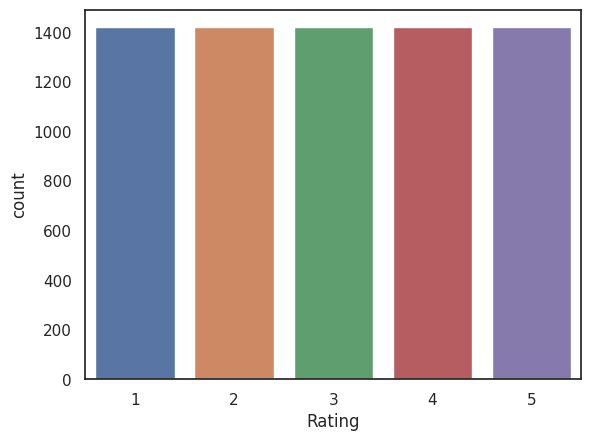

In [16]:
sns.set_theme(style="white")
sns.countplot(x = df['Rating'])

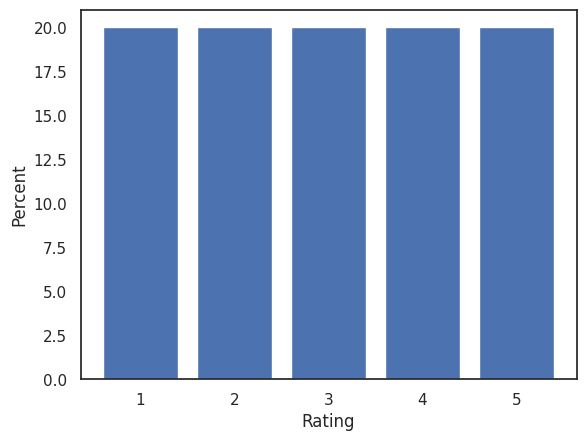

In [17]:
count_by_rating = df['Rating'].value_counts()

total_count = count_by_rating.sum()

percent_by_rating = count_by_rating / total_count * 100

plt.bar(percent_by_rating.index, percent_by_rating.values)

plt.xlabel('Rating')
plt.ylabel('Percent')
plt.show()

In [22]:
df['Word_count']= df['Review'].map(lambda x: len(x.split()))
df.head(2)

,Review,Rating,Word_count
0,horrible customer service hotel stay february ...,1,214
1,"noise airconditioner-a standard, arranged stay...",1,86


<Axes: xlabel='Rating', ylabel='Word_count'>

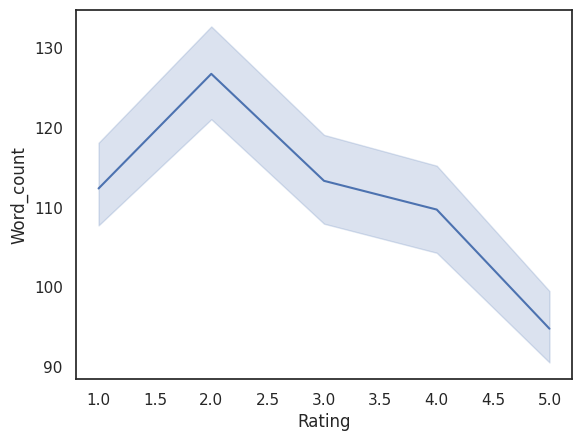

In [23]:
sns.lineplot(x='Rating', y='Word_count', data=df)

The review rate as 2 is highest

# 4. Sentiment Anlysis

In [158]:
from textblob import TextBlob

In [159]:
def polarity(x):
    blob = TextBlob(x)
    return blob.sentiment.polarity


In [160]:
def subjectivity(x):
    blob = TextBlob(x)
    return blob.sentiment.subjectivity

In [161]:
df['polarity']= df['Review'].apply(polarity)
df['Subjectivity']= df['Review'].apply(subjectivity)

In [ ]:
df.head()

,Review,Rating,Word_count,polarity,Subjectivity
0,nice hotel expensive parking got good deal sta...,4,87,0.208744,0.687000
1,ok nothing special charge diamond member hilto...,2,250,0.214923,0.495009
2,nice rooms not 4* experience hotel monaco seat...,3,217,0.294420,0.605208
3,"unique, great stay, wonderful time hotel monac...",5,89,0.504825,0.691228
4,"great stay great stay, went seahawk game aweso...",5,191,0.384615,0.629396


In [162]:
conditions = [
    (df['polarity']>0),
    (df['polarity']<0),
    (df['polarity']==0)
]
values = ['Positive','Negative','Nuetral']
df['polarity_new'] = np.select(conditions,values) #distribute

In [ ]:
df.head()

,Review,Rating,polarity,Subjectivity,polarity_new
0,nice hotel expensive parking got good deal sta...,4,0.208744,0.687000,Positive
1,ok nothing special charge diamond member hilto...,2,0.214923,0.495009,Positive
2,nice rooms not 4* experience hotel monaco seat...,3,0.294420,0.605208,Positive
3,"unique, great stay, wonderful time hotel monac...",5,0.504825,0.691228,Positive
4,"great stay great stay, went seahawk game aweso...",5,0.384615,0.629396,Positive


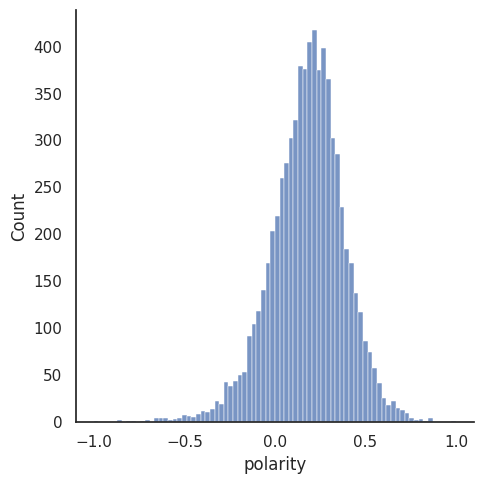

In [143]:
sns.displot(df['polarity'])

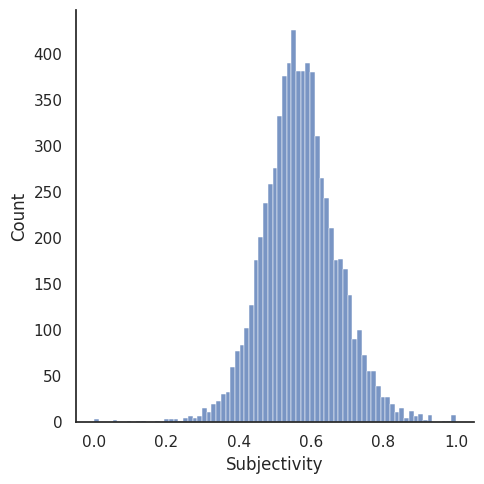

In [144]:
sns.displot(df['Subjectivity'])

<Axes: xlabel='polarity_new', ylabel='count'>

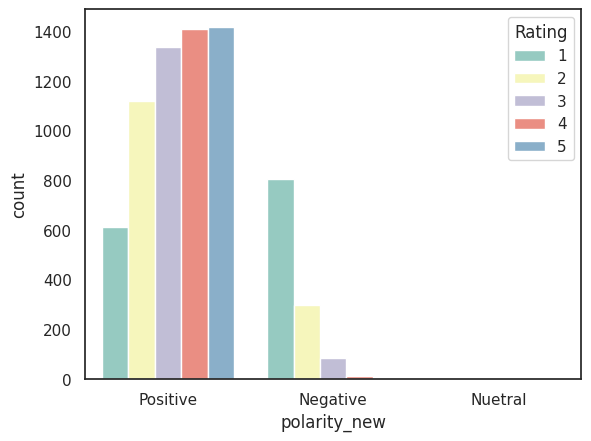

In [145]:
sns.countplot(x='polarity_new',hue='Rating',data=df, palette="Set3")

In [163]:
conditions1 = [
    (df['Subjectivity']>0.5),
    (df['Subjectivity']<0.5),
    (df['Subjectivity']==0.5)
]
values1 = ['subjectivity ','objectivity ','Nuetral']
df['subjectivity_new'] = np.select(conditions1,values1) #distribute

<Axes: xlabel='subjectivity_new', ylabel='count'>

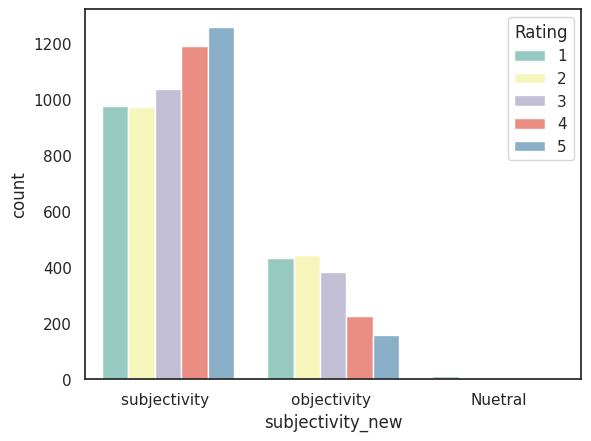

In [33]:
sns.countplot(x='subjectivity_new',hue='Rating',data=df, palette="Set3")

## 5.Text Cleaning(Pre-processing of data)

### A. Remove stopwords

In [164]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop = stopwords.words('english')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [165]:
#remove stopwords
df['Review'] = df['Review'].apply(lambda x:' '.join([word for word in x.split() if word not in (stop)]))

In [ ]:
df.head()

,Review,Rating,Word_count,polarity,Subjectivity,polarity_new
0,nice hotel expensive parking got good deal sta...,4,87,0.208744,0.687000,Positive
1,ok nothing special charge diamond member hilto...,2,250,0.214923,0.495009,Positive
2,nice rooms 4* experience hotel monaco seattle ...,3,217,0.294420,0.605208,Positive
3,"unique, great stay, wonderful time hotel monac...",5,89,0.504825,0.691228,Positive
4,"great stay great stay, went seahawk game aweso...",5,191,0.384615,0.629396,Positive


### B. Stemming

In [166]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

In [167]:
# Split the sentences to lists of words.
df['Review_stemming'] = df['Review'].str.split()
# Make sure we see the full column.
pd.set_option('display.max_colwidth', 1)
df['Review_stemming'] = df['Review_stemming'].apply(lambda x: [stemmer.stem(y) for y in x]) # Stem every word.

In [ ]:
df.head(3)

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3


### C. Lemmatization

In [168]:
nltk.download('wordnet')
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]
df['Review_lemmatize'] = df.Review.apply(lemmatize_text)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
df.head(2)

,Review,Rating,Review_lemmatize
0,nice hotel expensive parking got good deal sta...,4,"[nice, hotel, expensive, parking, got, good, d..."
1,ok nothing special charge diamond member hilto...,2,"[ok, nothing, special, charge, diamond, member..."


### D. Make sentences

In [169]:
import re
def make_sentences(data,name):
    data[name]=data[name].apply(lambda x:' '.join([i+' ' for i in x]))
    # Removing double spaces if created
    data[name]=data[name].apply(lambda x:re.sub(r'\s+', ' ', x, flags=re.I))

In [170]:
make_sentences(df,'Review_stemming')
make_sentences(df,'Review_lemmatize')

In [ ]:
df.head()

,Review,Rating,Sentiment,Review_stemming,Review_lemmatize,polarity,Subjectivity,polarity_new,subjectivity_new
0,"nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff neck high pillows, soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway, maybe noisy neighbors, aveda bath products nice, goldfish stay nice touch taken advantage staying longer, location great walking distance shopping, overall nice experience pay 40 parking night,",4,1,"nice hotel expens park got good deal stay hotel anniversary, arriv late even took advic previous review did valet parking, check quick easy, littl disappoint non-exist view room room clean nice size, bed comfort woke stiff neck high pillows, not soundproof like heard music room night morn loud bang door open close hear peopl talk hallway, mayb just noisi neighbors, aveda bath product nice, did not goldfish stay nice touch taken advantag stay longer, locat great walk distanc shopping, overal nice experi have pay 40 park night,","nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous review did valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff neck high pillows, not soundproof like heard music room night morning loud bang door opening closing hear people talking hallway, maybe just noisy neighbors, aveda bath product nice, did not goldfish stay nice touch taken advantage staying longer, location great walking distance shopping, overall nice experience having pay 40 parking night,",0.208744,0.687000,Positive,subjectivity
1,"ok nothing special charge diamond member hilton decided chain shot 20th anniversary seattle, start booked suite paid extra website description not, suite bedroom bathroom standard hotel room, took printed reservation desk showed said things like tv couch ect desk clerk told oh mixed suites description kimpton website sorry free breakfast, got kidding, embassy suits sitting room bathroom bedroom unlike kimpton calls suite, 5 day stay offer correct false advertising, send kimpton preferred guest website email asking failure provide suite advertised website reservation description furnished hard copy reservation printout website desk manager duty reply solution, send email trip guest survey follow email mail, guess tell concerned guest.the staff ranged indifferent helpful, asked desk good breakfast spots neighborhood hood told hotels, gee best breakfast spots seattle 1/2 block away convenient hotel know exist, arrived late night 11 pm inside run bellman busy chating cell phone help bags.prior arrival emailed hotel inform 20th anniversary half really picky wanted make sure good, got nice email saying like deliver bottle champagne chocolate covered strawberries room arrival celebrate, told needed foam pillows, arrival champagne strawberries foam pillows great room view alley high rise building good better housekeeping staff cleaner room property, impressed left morning shopping room got short trips 2 hours, beds comfortable.not good ac-heat control 4 x 4 inch screen bring green shine directly eyes night, light sensitive tape controls.this 4 start hotel clean business hotel super high rates, better chain hotels seattle,",2,0,"ok noth special charg diamond member hilton decid chain shot 20th anniversari seattle, start book suit paid extra websit descript not, suit bedroom bathroom standard hotel room, took print reserv desk show said thing like tv couch ect desk clerk told oh mix suit descript kimpton websit sorri free breakfast, got kidding, embassi suit sit room bathroom bedroom unlik kimpton call suite, 5 day stay offer correct fals advertising, send kimpton prefer guest websit email ask failur provid suit advertis we

### E. Back to Annalysis-Word cloud

In [45]:
rev_stemming = " ".join([review for review in df['Review_stemming']])
rev_stemming[:200]

'horribl custom servic hotel stay februari 3rd 4th 2007mi friend pick hotel monaco appeal websit onlin packag includ champagn late checkout 3 free valet gift spa weekend, friend check room hour earlier'

In [46]:
rev_lmtz = " ".join([review for review in df['Review_lemmatize']])
rev_lmtz[:200]

'horrible customer service hotel stay february 3rd 4th 2007my friend picked hotel monaco appealing website online package included champagne late checkout 3 free valet gift spa weekend, friend checked '

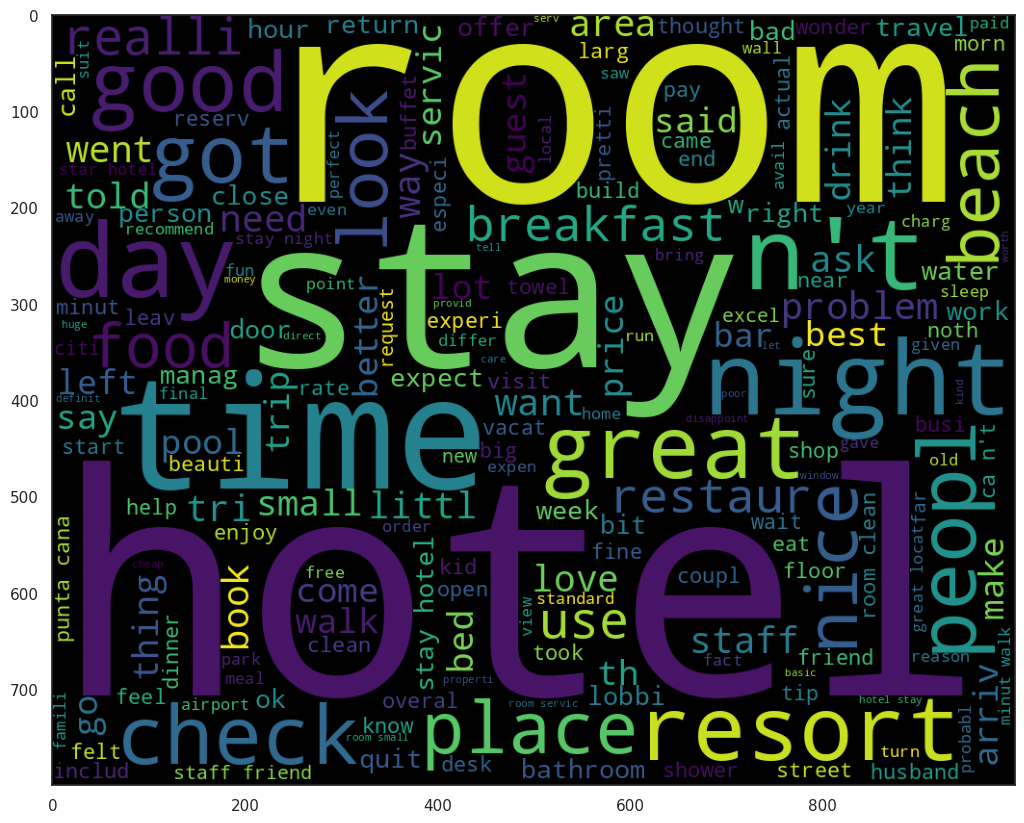

In [47]:
from wordcloud import WordCloud

plt.figure(figsize=(15,10))
wc= WordCloud(max_words=200,height= 800, width=1000 ,background_color='black').generate(rev_stemming)
plt.imshow(wc)

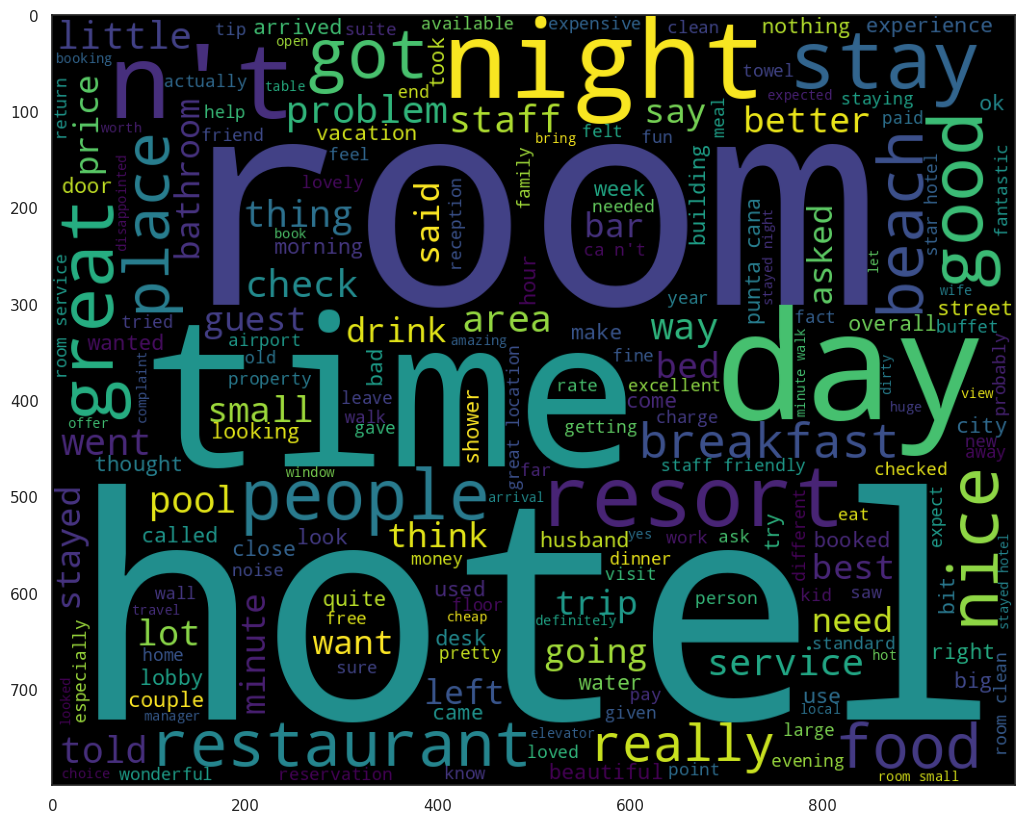

In [171]:
from wordcloud import WordCloud

plt.figure(figsize=(15,10))
wc= WordCloud(max_words=200,height= 800, width=1000 ,background_color='black').generate(rev_lmtz)
plt.imshow(wc)

#### Create sentiment feature

In [172]:
def sentiment(review):
    if review>3:
        return 1
    else:
        return 0
df['Sentiment']= df['Rating'].apply(sentiment)

In [98]:
df.head(2)

,Review,Rating,Word_count,polarity,Subjectivity,polarity_new,subjectivity_new,Review_stemming,Review_lemmatize,Sentiment
0,"horrible customer service hotel stay february 3rd 4th 2007my friend picked hotel monaco appealing website online package included champagne late checkout 3 free valet gift spa weekend, friend checked room hours earlier came later, pulled valet young man stood, asked valet open said, pull bags didn__Ç_é_ offer help, got garment bag suitcase came car key room number says valet, car park car street pull, left key working asked valet park car gets, went room fine bottle champagne oil lotion gift spa, dressed went came got bed noticed blood drops pillows sheets pillows, disgusted unbelievable, called desk sent somebody 20 minutes later, swapped sheets left apologizing, sunday morning called desk speak management sheets aggravated rude, apparently manager kind supervisor weekend wait monday morning, young man spoke said cover food adding person changed sheets said fresh blood rude tone, checkout 3pm package booked, 12 1:30 staff maids tried walk room opening door apologizing closing, people called saying check 12 remind package, finally packed things went downstairs check, quickly signed paper took, way took closer look room, unfortunately covered food offered charged valet, called desk ask charges lady answered snapped saying aware problem experienced monday like told earlier, life treated like hotel, sure hotel constantly problems lucky ones stay recommend anybody know,",1,214,0.006510,0.573611,Positive,subjectivity,"horribl custom servic hotel stay februari 3rd 4th 2007mi friend pick hotel monaco appeal websit onlin packag includ champagn late checkout 3 free valet gift spa weekend, friend check room hour earlier came later, pull valet young man stood, ask valet open said, pull bag didn__ç_é_ offer help, got garment bag suitcas came car key room number say valet, car park car street pull, left key work ask valet park car gets, went room fine bottl champagn oil lotion gift spa, dress went came got bed notic blood drop pillow sheet pillows, disgust unbelievable, call desk sent somebodi 20 minut later, swap sheet left apologizing, sunday morn call desk speak manag sheet aggrav rude, appar manag kind supervisor weekend wait monday morning, young man spoke said cover food ad person chang sheet said fresh blood rude tone, checkout 3pm packag booked, 12 1:30 staff maid tri walk room open door apolog closing, peopl call say check 12 remind package, final pack thing went downstair check, quick sign paper took, way took closer look room, unfortun cover food offer charg valet, call desk ask charg ladi answer snap say awar problem experienc monday like told earlier, life treat like hotel, sure hotel constant problem lucki one stay recommend anybodi know,","horrible customer service hotel stay february 3rd 4th 2007my friend picked hotel monaco appealing website online package included champagne late checkout 3 free valet gift spa weekend, friend checked room hour earlier came later, pulled valet young man stood, asked valet open said, pull bag didn__Ç_é_ offer help, got garment bag suitcase came car key room number say valet, car park car street pull, left key working asked valet park car gets, went room fine bottle champagne oil lotion gift spa, dressed went came got bed noticed blood drop pillow sheet pillows, disgusted unbelievable, called desk sent somebody 20 minute later, swapped sheet left apologizing, sunday morning called desk speak management sheet aggravated rude, apparently manager kind supervisor weekend wait monday morning, young man spoke said cover food adding person changed sheet said fresh blood rude tone, checkout 3pm package booked, 12 1:30 staff maid tried walk room opening door apologizing closing, people called saying check 12 remind package, finally packed thing went downstairs check, quickly signed paper took, way took closer look room, unfortunately covered food offered charged valet, called des

# 6.Creating our model and find best model by grid search

We will use 4 model to learn this problem. It's Logistic regression, Randomforest, SVM and Naive Bayes

In [188]:
from sklearn.model_selection import train_test_split
X= df['Review_stemming']
Y= df['Sentiment']

X_train, X_test,y_train, y_test= train_test_split(X, Y, test_size=0.2, stratify=Y)

### Vectorization(Tfidf)

In [189]:
nltk.download('punkt')
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf= TfidfVectorizer(max_features=10000, tokenizer= word_tokenize,ngram_range=(1,2) )
X_train_tfidf= tfidf.fit_transform(X_train.values)
X_test_tfidf= tfidf.transform(X_test.values)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### 6A. Logistic regression

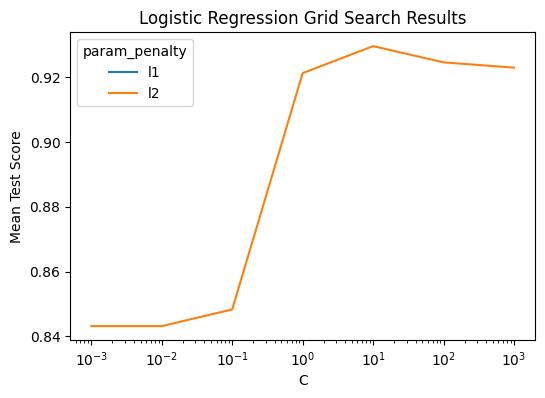

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

# create a dictionary of all values we want to test
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
              'penalty': ['l1', 'l2']
             }

# logistic regression model
logreg = LogisticRegression()

# use gridsearch to test all values
logreg_grid = GridSearchCV(logreg, param_grid)
logreg_grid.fit(X_train_tfidf,y_train)

# convert the results to a DataFrame
results = pd.DataFrame(logreg_grid.cv_results_)

# plot the mean test scores for each value of C
plt.figure(figsize=(6, 4))
sns.lineplot(data=results, x='param_C', y='mean_test_score', hue='param_penalty')

plt.xscale('log')
plt.xlabel('C')
plt.ylabel('Mean Test Score')
plt.title('Logistic Regression Grid Search Results')
plt.show()


Thus, the best solution is

In [ ]:
print("Best parameters found: ", logreg_grid.best_params_)
print("Best score: ", logreg_grid.best_score_)

Best parameters found:  {'C': 10, 'penalty': 'l2'}
Best score:  0.9295289148185732


In [ ]:
from sklearn.linear_model import LogisticRegression

best_lr=logreg_grid.best_estimator_
best_lr.fit(X_train_tfidf, y_train)

LogisticRegression(C=10)

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
y_pred_tfidf = best_lr.predict(X_test_tfidf)

print(confusion_matrix(y_test,y_pred_tfidf))
print(accuracy_score(y_test,y_pred_tfidf))
print(classification_report(y_test,y_pred_tfidf))
print(accuracy_score(y_test, y_pred_tfidf))

[[ 572  232]
 [ 134 4185]]
0.9285574858481359
              precision    recall  f1-score   support

           0       0.81      0.71      0.76       804
           1       0.95      0.97      0.96      4319

    accuracy                           0.93      5123
   macro avg       0.88      0.84      0.86      5123
weighted avg       0.93      0.93      0.93      5123

0.9285574858481359


### 6B. Random Forest

In [175]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 40],
    'min_samples_split': [2, 5, 10]
}

# random forest model
rf = RandomForestClassifier()

# use gridsearch to test all values
rf_grid = GridSearchCV(rf, param_grid, cv=5)
rf_grid.fit(X_train_tfidf,y_train)

# convert the results to a DataFrame
results = pd.DataFrame(rf_grid.cv_results_)

In [176]:
print("Best parameters found: ", rf_grid.best_params_)
print("Best score: ", rf_grid.best_score_)

Best parameters found:  {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}
Best score:  0.8419691884892846


#### evaluate the effect of criterion

In [177]:
from sklearn.model_selection import learning_curve


def cross_validation(estimator):
    _, train_scores, test_scores = learning_curve(estimator, X_train_tfidf, y_train, cv=10, n_jobs=-1, train_sizes=[1.0, ], scoring="accuracy")
    test_scores = test_scores[0]
    mean, std = test_scores.mean(), test_scores.std()
    return mean, std

def plot(title, xlabel, X, Y, error, ylabel = "Accuracy"):
    plt.xlabel(xlabel)
    plt.title(title)
    plt.grid()
    plt.ylabel(ylabel)

    plt.errorbar(X, Y, error, linestyle='None', marker='o')

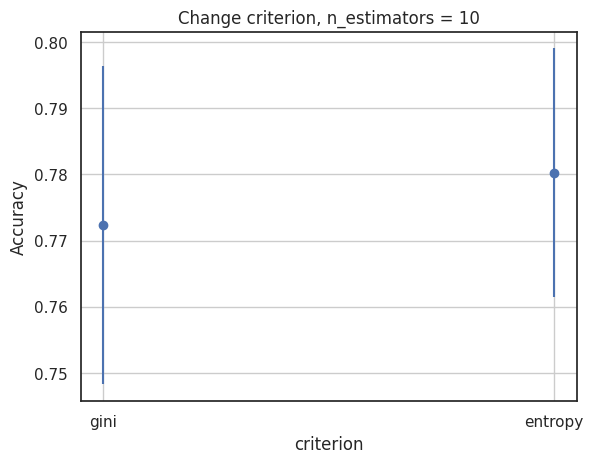

In [178]:
from sklearn.ensemble import RandomForestClassifier

title = "Change criterion, n_estimators = 10"
xlabel = "criterion"
X = []
Y = []
error = []
criterions = ["gini", "entropy"]
for criterion in criterions:

    text_clf = RandomForestClassifier(criterion=criterion, n_estimators=10)
    mean, std = cross_validation(text_clf)
    X.append(str(criterion))
    Y.append(mean)
    error.append(std)

plot(title, xlabel, X, Y, error)
plt.show()

<Axes: xlabel='param_n_estimators', ylabel='mean_test_score'>

<Figure size 600x400 with 0 Axes>

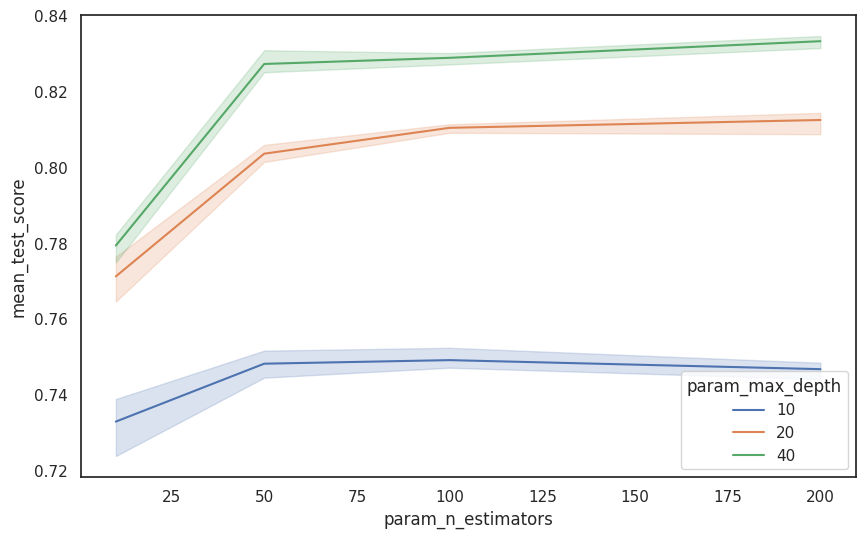

In [179]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))
plt.figure(figsize=(10, 6))
sns.lineplot(data=results, x='param_n_estimators', y='mean_test_score', hue='param_max_depth')


<Axes: xlabel='param_n_estimators', ylabel='mean_test_score'>

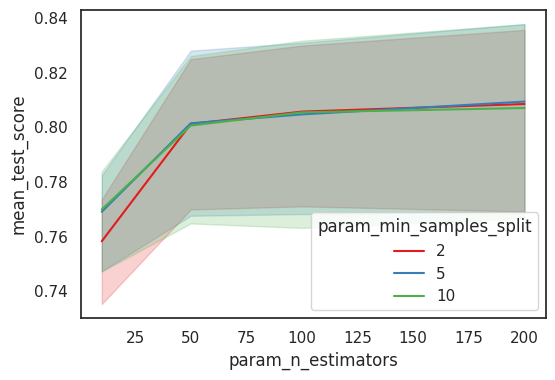

In [180]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))

sns.lineplot(data=results, x='param_n_estimators', y='mean_test_score', hue='param_min_samples_split', palette="Set1")

#### So we need evaluate of max_depth > 40, min_sample_split > 10 and n_estimators > 200

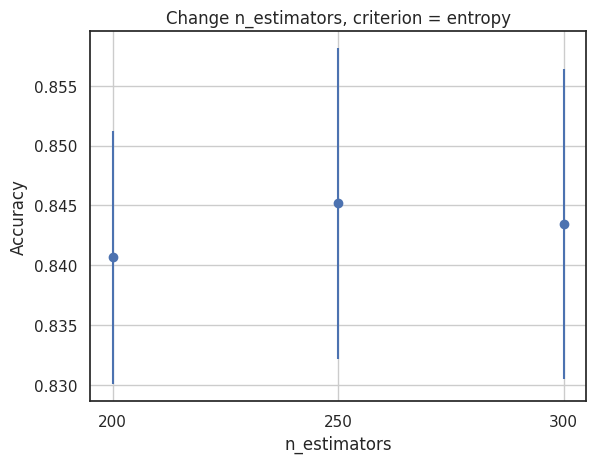

In [83]:
title = "Change n_estimators, criterion = entropy"
xlabel = "n_estimators"
X = []
Y = []
error = []
n_estimators1 = [200, 250, 300]
for n_estimators in n_estimators1:
    text_clf = RandomForestClassifier(criterion='entropy', n_estimators=n_estimators)
    mean, std = cross_validation(text_clf)
    X.append(str(n_estimators))
    Y.append(mean)
    error.append(std)

plot(title, xlabel, X, Y, error)
plt.show()


#### So n_estimators >= 200 give the same accuracy score

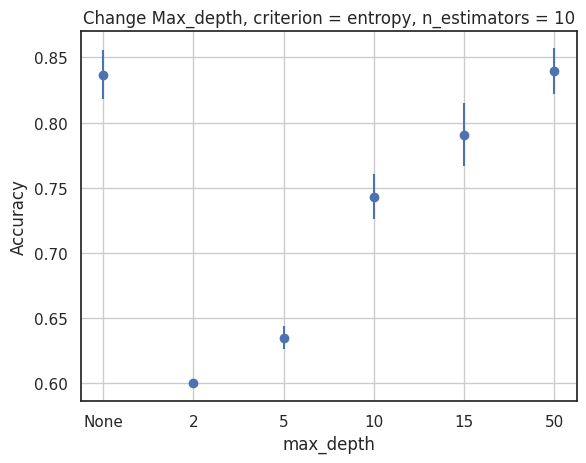

In [182]:
title = "Change Max_depth, criterion = entropy, n_estimators = 200"
xlabel = "max_depth"
X = []
Y = []
error = []
max_depths = [None, 2, 5, 10, 15, 50]
for max_depth in max_depths:

    text_clf = RandomForestClassifier(criterion='entropy', n_estimators=200, max_depth=max_depth)
    mean, std = cross_validation(text_clf)
    X.append(str(max_depth))
    Y.append(mean)
    error.append(std)

plot(title, xlabel, X, Y, error)
plt.show()


#### So max_depth has little effect on accuracy score, we will select max_depth=None, it will make our model less complicated and take less time but it maybe overfiting. And max_depth larger is the same We need to observe more

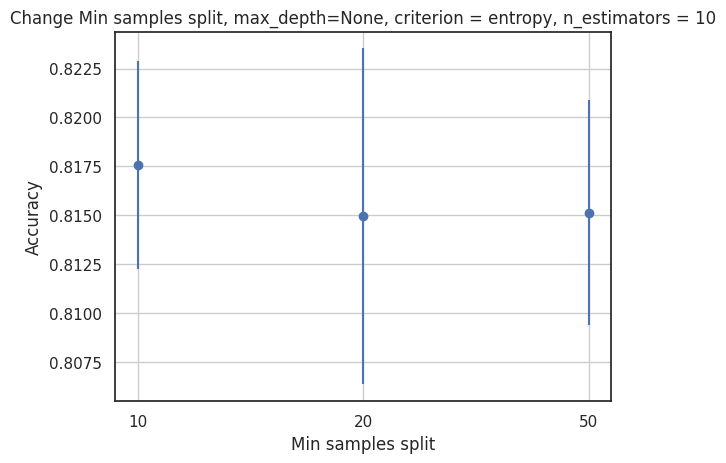

In [89]:
title = "Change Min samples split, max_depth=None, criterion = entropy, n_estimators = 200"
xlabel = "Min samples split"
X = []
Y = []
error = []
min_samples_splits = [10, 20, 50]
for min_sample_split in min_samples_splits:

    text_clf = RandomForestClassifier(criterion='entropy', n_estimators=200, max_depth=20, min_samples_split=min_sample_split)
    mean, std = cross_validation(text_clf)
    X.append(str(min_sample_split))
    Y.append(mean)
    error.append(std)

plot(title, xlabel, X, Y, error)
plt.show()

#### So min sample split equals 2 that will give the best accuracy score

### Thus, the best params is: {criterion='entropy', n_estimators=2500, max_depth=100, min_samples_split=50}

In [186]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(criterion='entropy', n_estimators=200, max_depth=20, min_samples_split=10)
clf.fit(X_train_tfidf,y_train)
y_pred = clf.predict(X_test_tfidf)

In [187]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
y_pred_train = clf.predict(X_train_tfidf)
print('accuracy score of train set: ', accuracy_score(y_train, y_pred_train))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

accuracy score of train set:  0.9485735735735735
[[1009   57]
 [ 298  413]]
              precision    recall  f1-score   support

           0       0.77      0.95      0.85      1066
           1       0.88      0.58      0.70       711

    accuracy                           0.80      1777
   macro avg       0.83      0.76      0.77      1777
weighted avg       0.81      0.80      0.79      1777

0.8002250984805852


### So, with best-estimator, we gain a best accuracy score is 0.8912

### 6C. SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV


# create a dictionary of all values we want to test
param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [None, 0.001, 0.01, 0.1, 1, 2, 5, 10],
              'kernel': ['linear', 'rbf']}

# SVM model
svc = SVC()

# use gridsearch to test all values
svc_grid = GridSearchCV(svc, param_grid, cv=5)
svc_grid.fit(X_train_tfidf,y_train)


KeyboardInterrupt: 

Training time is 150 minutes

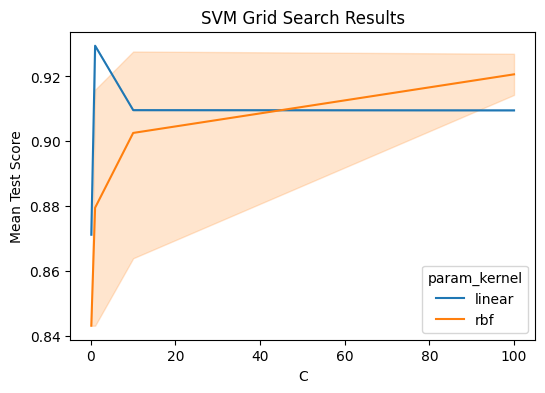

In [ ]:
import matplotlib.pyplot as plt
# convert the results to a DataFrame
results = pd.DataFrame(svc_grid.cv_results_)
# plot the mean test scores for each combination of hyperparameters
plt.figure(figsize=(6, 4))
sns.lineplot(data=results, x='param_C', y='mean_test_score', hue='param_kernel',)
plt.xlabel('C')
plt.ylabel('Mean Test Score')
plt.title('SVM Grid Search Results')
plt.show()

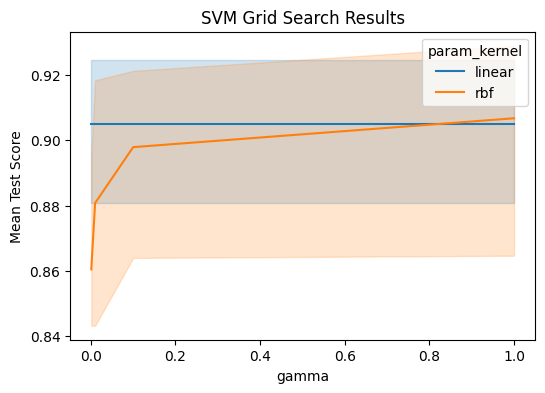

In [ ]:
import matplotlib.pyplot as plt
# plot the mean test scores for each combination of hyperparameters
plt.figure(figsize=(6, 4))
sns.lineplot(data=results, x='param_gamma', y='mean_test_score', hue='param_kernel',)
plt.xlabel('gamma')
plt.ylabel('Mean Test Score')
plt.title('SVM Grid Search Results')
plt.show()

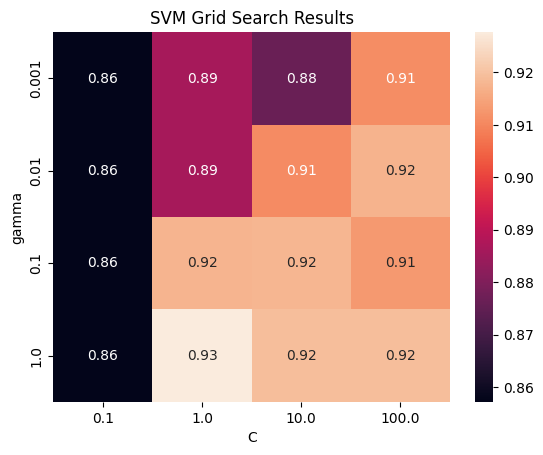

In [ ]:
pivot = results.pivot_table(values='mean_test_score', index='param_gamma', columns='param_C')

# create a heatmap of the pivot table
sns.heatmap(pivot, annot=True)
plt.xlabel('C')
plt.ylabel('gamma')
plt.title('SVM Grid Search Results')
plt.show()

In [ ]:
print("Best parameters found: ", svc_grid.best_params_)
print("Best score: ", svc_grid.best_score_)

Best parameters found:  {'C': 1, 'gamma': 0.001, 'kernel': 'linear'}
Best score:  0.9294644881723222


### We see both plot that, the paramater whcich from grid search give best score is different on plot. So we will implement model with parameter which give best score on plot

In [ ]:
from sklearn import svm
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
model = svm.SVC(C=1, gamma=10, kernel='rbf')
y_pred  =  model.fit(X_train_tfidf,y_train).predict(X_test_tfidf)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[ 248  556]
 [  75 4244]]
              precision    recall  f1-score   support

           0       0.77      0.31      0.44       804
           1       0.88      0.98      0.93      4319

    accuracy                           0.88      5123
   macro avg       0.83      0.65      0.69      5123
weighted avg       0.87      0.88      0.85      5123

0.8768299824321687


C=1, gamma=1, kernel='rbf'

In [ ]:
from sklearn import svm
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
model = svm.SVC(C=1, gamma=1, kernel='rbf')
y_pred  =  model.fit(X_train_tfidf,y_train).predict(X_test_tfidf)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[ 545  259]
 [  94 4225]]
              precision    recall  f1-score   support

           0       0.85      0.68      0.76       804
           1       0.94      0.98      0.96      4319

    accuracy                           0.93      5123
   macro avg       0.90      0.83      0.86      5123
weighted avg       0.93      0.93      0.93      5123

0.9310950614874097


C=100, gamma=1, kernel='rbf'

In [ ]:
from sklearn import svm
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
model = svm.SVC(C=100, gamma=1, kernel='rbf')
y_pred  =  model.fit(X_train_tfidf,y_train).predict(X_test_tfidf)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[ 565  239]
 [ 122 4197]]
              precision    recall  f1-score   support

           0       0.82      0.70      0.76       804
           1       0.95      0.97      0.96      4319

    accuracy                           0.93      5123
   macro avg       0.88      0.84      0.86      5123
weighted avg       0.93      0.93      0.93      5123

0.9295334764786258


C=1, gamma=1.0, kernel='linear'

In [ ]:
from sklearn import svm
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
model = svm.SVC(C=1, gamma=1.0, kernel='linear')
y_pred  =  model.fit(X_train_tfidf,y_train).predict(X_test_tfidf)

In [ ]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[ 559  245]
 [ 115 4204]]
              precision    recall  f1-score   support

           0       0.83      0.70      0.76       804
           1       0.94      0.97      0.96      4319

    accuracy                           0.93      5123
   macro avg       0.89      0.83      0.86      5123
weighted avg       0.93      0.93      0.93      5123

0.9297286746047237


Use best_estimators_ from grid search package

In [ ]:
from sklearn import svm
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
model = svm.SVC(C=1, gamma=0.001, kernel='linear')
y_pred  =  model.fit(X_train_tfidf,y_train).predict(X_test_tfidf)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[ 573  231]
 [ 137 4182]]
              precision    recall  f1-score   support

           0       0.81      0.71      0.76       804
           1       0.95      0.97      0.96      4319

    accuracy                           0.93      5123
   macro avg       0.88      0.84      0.86      5123
weighted avg       0.93      0.93      0.93      5123

0.9281670895959399


### So the paramators which give the best accuracy score (0.931) is C=1, gamma=1, kernel='rbf'

### 6D. Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

X_train_tfidf_array = X_train_tfidf.toarray()
X_test_tfidf_array = X_test_tfidf.toarray()

param_grid = {'priors': [None, [0.25, 0.25, 0.5], [0.1, 0.5, 0.4]],
              'var_smoothing': [1e-9, 1e-7, 1e-5]}

nb_model = GaussianNB()

# Thực hiện grid search
nb_grid = GridSearchCV(nb_model, param_grid)
nb_grid.fit(X_train_tfidf_array,y_train)

GridSearchCV(estimator=GaussianNB(),
             param_grid={'priors': [None, [0.25, 0.25, 0.5], [0.1, 0.5, 0.4]],
                         'var_smoothing': [1e-09, 1e-07, 1e-05]})

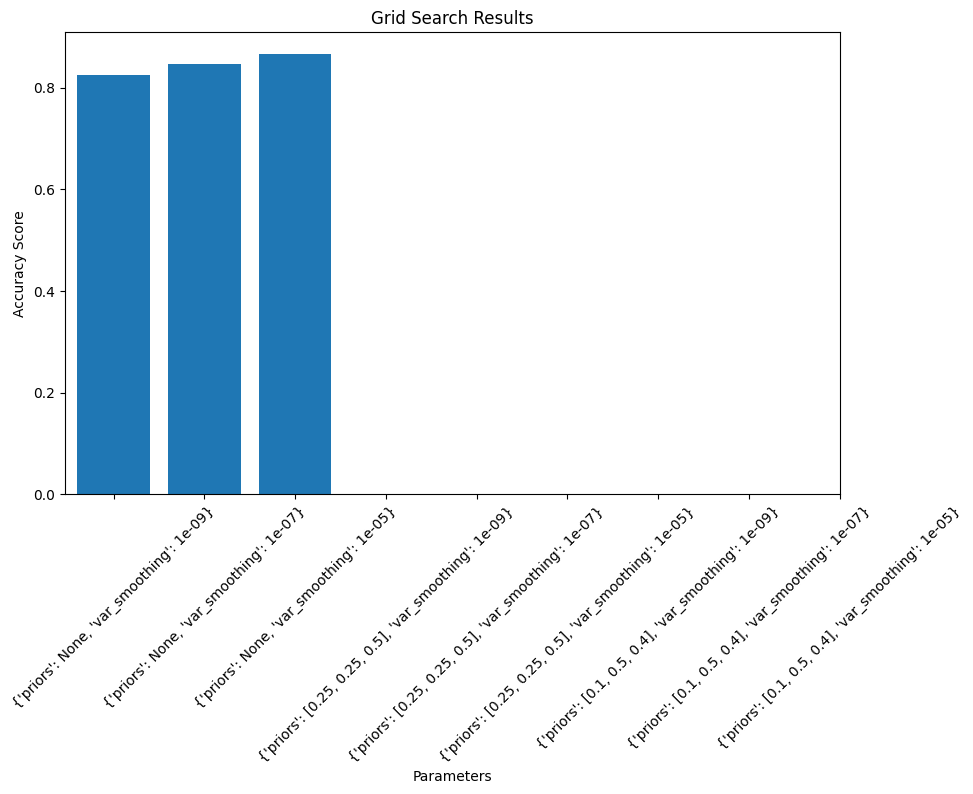

In [ ]:
import matplotlib.pyplot as plt

# Lấy các thông số từ kết quả grid search
params = nb_grid.cv_results_['params']
mean_scores = nb_grid.cv_results_['mean_test_score']

# Biểu đồ thể hiện accuracy score
plt.figure(figsize=(10, 6))
plt.bar(range(len(params)), mean_scores)
plt.xticks(range(len(params)), [str(param) for param in params], rotation=45)
plt.xlabel('Parameters')
plt.ylabel('Accuracy Score')
plt.title('Grid Search Results')
plt.show()

In [ ]:
print("Các tham số tốt nhất:", nb_grid.best_params_)
print("Điểm chính xác tốt nhất:", nb_grid.best_score_)

Các tham số tốt nhất: {'priors': None, 'var_smoothing': 1e-05}
Điểm chính xác tốt nhất: 0.8660201630207988


In [ ]:
X_train_tfidf = X_train_tfidf.toarray()
X_test_tfidf = X_test_tfidf.toarray()

from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB(priors=None, var_smoothing=1e-05)
y_pred  =  nb_model.fit(X_train_tfidf,y_train).predict(X_test_tfidf)

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[ 552  252]
 [ 434 3885]]
              precision    recall  f1-score   support

           0       0.56      0.69      0.62       804
           1       0.94      0.90      0.92      4319

    accuracy                           0.87      5123
   macro avg       0.75      0.79      0.77      5123
weighted avg       0.88      0.87      0.87      5123

0.8660940854967792


# 7.Conclusion

#### Thus, the accuray score after finding a best paramater applying to the test set for each model will be:
- Logistic Regression: 0.9286
- Random Forest: 0.8913
- Support Vector Machine: 0.931
- Naive Bayes: 0.8661



## Hence, after the prediction from diffrent type of algorithm with many paramaters, I concluded that the Support Vetor Machine gives maximum accuracy. Still if we compare with rest model we found that Naive Bayes gives lowest accuray